## Contents

svm

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()

In [6]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
print(wine.DESCR)
print(len(wine.feature_names))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

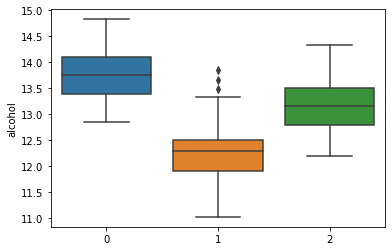

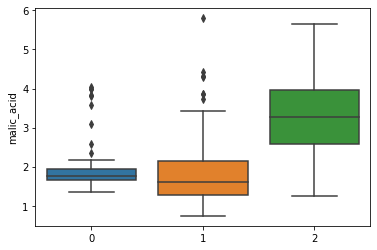

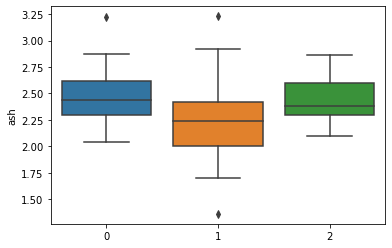

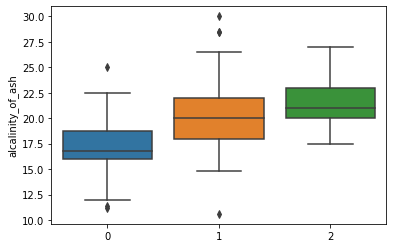

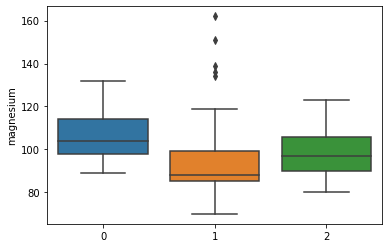

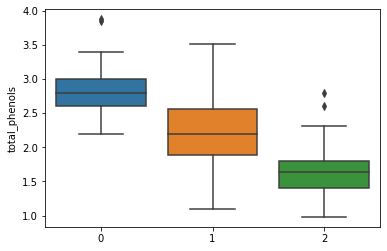

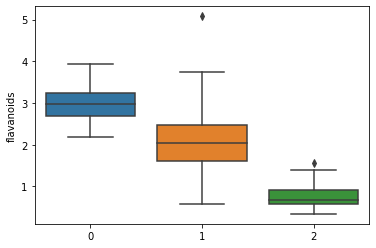

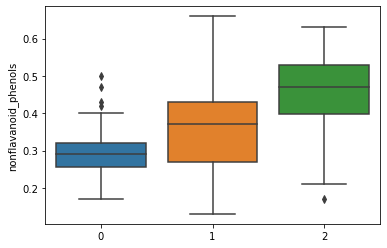

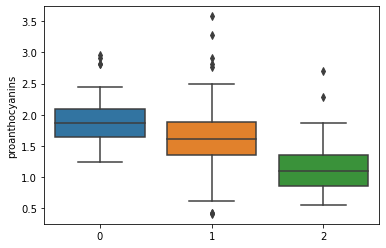

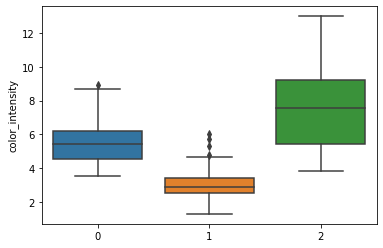

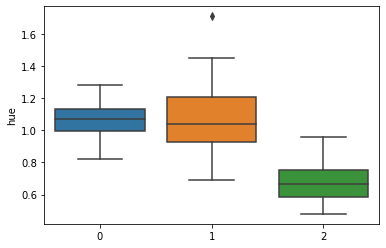

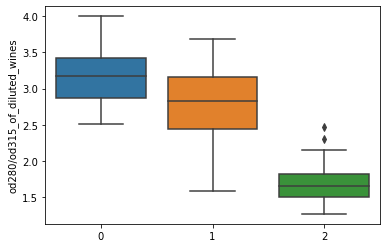

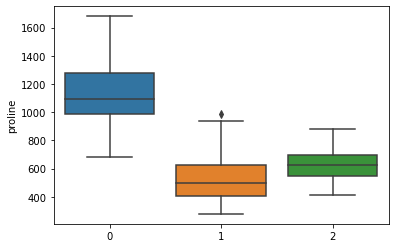

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
y = wine.target
x = wine.data
features = wine.feature_names
for i in range(13):
    sns.boxplot(x=y,y=x[:,i])
    plt.ylabel(features[i])
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=30)

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7222222222222222

In [17]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


In [19]:
kernel = ["linear","poly","rbf"]
for i in kernel:
    model = SVC(kernel=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("for kernel:",i)
    print("Accuracy is:",accuracy_score(y_test,y_pred))

for kernel: linear
Accuracy is: 0.9814814814814815
for kernel: poly
Accuracy is: 0.6851851851851852
for kernel: rbf
Accuracy is: 0.7222222222222222


In [20]:
for i in range(10):
    model = SVC(kernel="poly",degree=i,C=0.1)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("for kernel:",i)
    print("Accuracy is:",accuracy_score(y_test,y_pred))

for kernel: 0
Accuracy is: 0.42592592592592593
for kernel: 1
Accuracy is: 0.6666666666666666
for kernel: 2
Accuracy is: 0.6851851851851852
for kernel: 3
Accuracy is: 0.6666666666666666
for kernel: 4
Accuracy is: 0.6481481481481481
for kernel: 5
Accuracy is: 0.6666666666666666
for kernel: 6
Accuracy is: 0.6666666666666666
for kernel: 7
Accuracy is: 0.6481481481481481
for kernel: 8
Accuracy is: 0.6481481481481481
for kernel: 9
Accuracy is: 0.6666666666666666


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,100,1000],"kernel":["rbf","poly","sigmoid","linear"],"degree":[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [25]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
0.9814814814814815


###  Applying the above parameters to get best accuracy

In [26]:
from sklearn.svm import SVC
model = SVC(C= 0.1,degree= 1, kernel= 'linear')
model.fit(x_train,y_train)

SVC(C=0.1, degree=1, kernel='linear')

In [27]:
y_pred = model.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.9814814814814815

## Using breast cancer dataset from sklearn

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer.DESCR)
print(len(cancer.feature_names))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

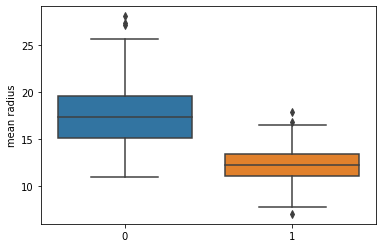

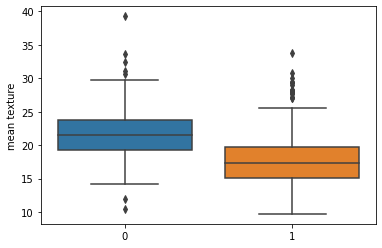

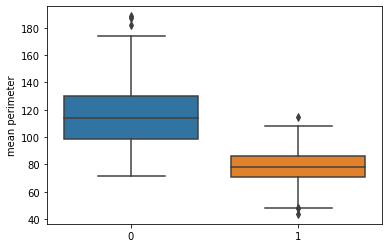

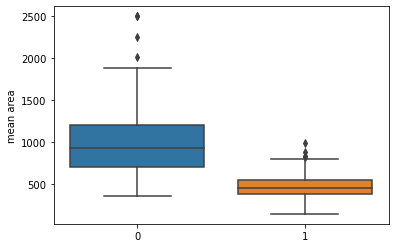

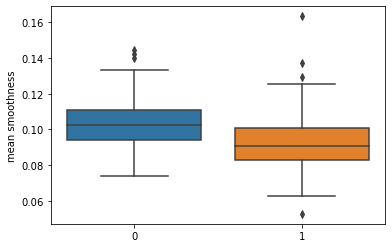

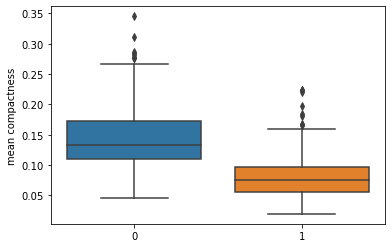

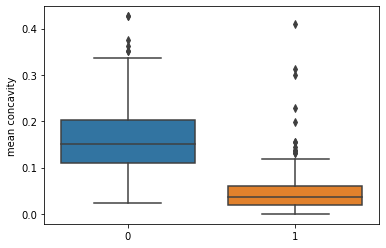

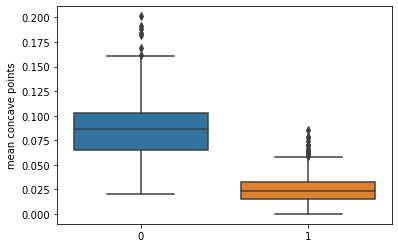

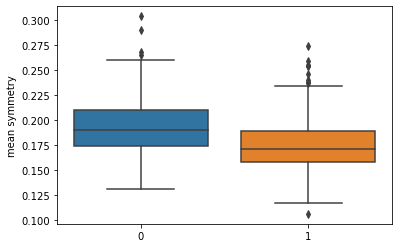

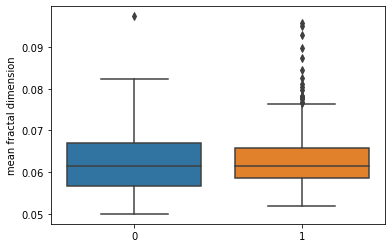

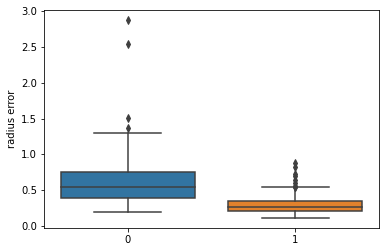

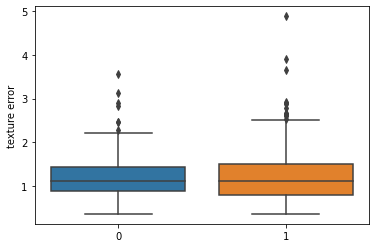

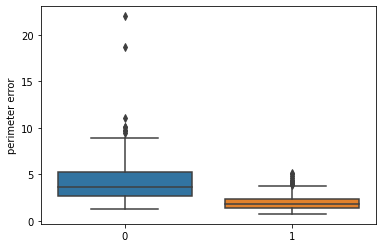

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
y = cancer.target
x = cancer.data
features = cancer.feature_names
for i in range(13):
    sns.boxplot(x=y,y=x[:,i])
    plt.ylabel(features[i])
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=30)

In [6]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [7]:
y_pred = model.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9122807017543859

In [9]:
kernel = ["linear","poly","rbf"]
for i in kernel:
    model = SVC(kernel=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("for kernel:",i)
    print("Accuracy is:",accuracy_score(y_test,y_pred))

for kernel: linear
Accuracy is: 0.9532163742690059
for kernel: poly
Accuracy is: 0.9122807017543859
for kernel: rbf
Accuracy is: 0.9122807017543859


In [10]:
for i in range(10):
    model = SVC(kernel="poly",degree=i,C=0.1)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("for kernel:",i)
    print("Accuracy is:",accuracy_score(y_test,y_pred))

for kernel: 0
Accuracy is: 0.6374269005847953
for kernel: 1
Accuracy is: 0.8830409356725146
for kernel: 2
Accuracy is: 0.8947368421052632
for kernel: 3
Accuracy is: 0.8888888888888888
for kernel: 4
Accuracy is: 0.8947368421052632
for kernel: 5
Accuracy is: 0.8947368421052632
for kernel: 6
Accuracy is: 0.8947368421052632
for kernel: 7
Accuracy is: 0.8947368421052632
for kernel: 8
Accuracy is: 0.8947368421052632
for kernel: 9
Accuracy is: 0.8947368421052632


In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,100,1000],"kernel":["rbf","poly","sigmoid","linear"],"degree":[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [12]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
0.9181286549707602


In [13]:
from sklearn.svm import SVC
model = SVC(C= 0.1,degree= 1, kernel= 'linear')
model.fit(x_train,y_train)

SVC(C=0.1, degree=1, kernel='linear')

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred)

0.9181286549707602